In [1]:
import os
import utils.cop as cop
from utils.data_loader import load_data, load_file, convert_signal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

--------------
reading data file ./COP analysis/data/2023-07-10 mci002/S61_20230710_rawDataLeft_60PUIKDwA5.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-07-10 mci002/S61_20230710_rawDataRight_60PUIKDwA5.txt
21 columns found


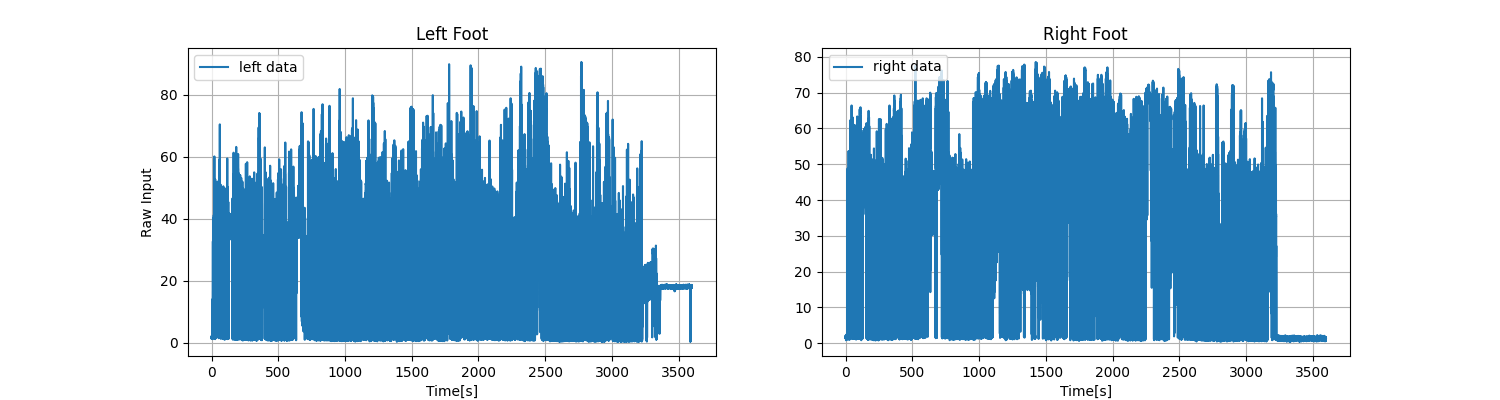

--------------
reading data file ./COP analysis/data/2023-07-10 mci002/S62_20230710_rawDataLeft_60PUIKDwA5.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-07-10 mci002/S62_20230710_rawDataRight_60PUIKDwA5.txt
21 columns found


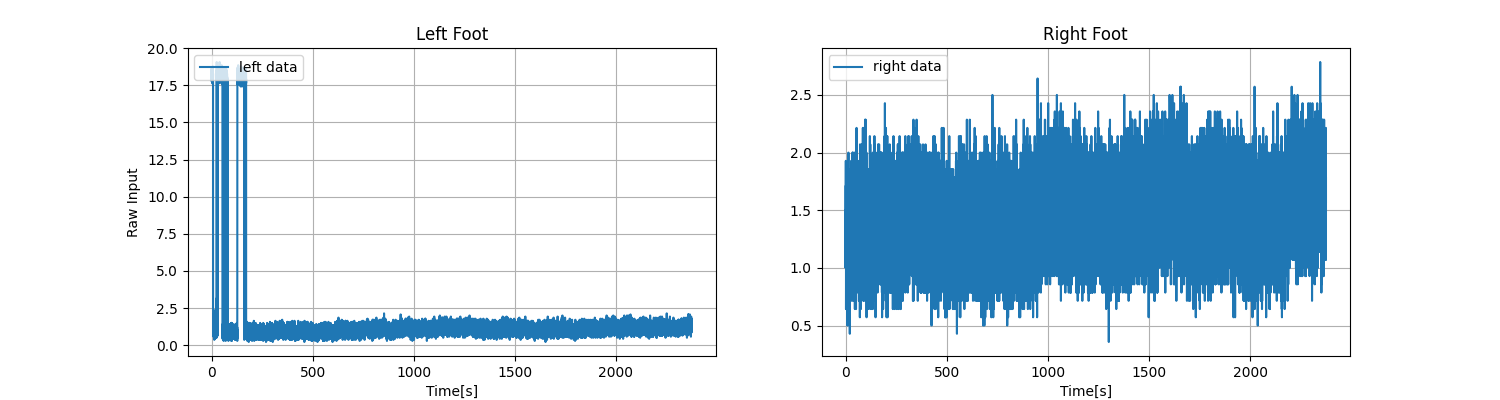

In [2]:
root_folder = './COP analysis'
root = f'{root_folder}/data/2023-07-10 mci002/'
file_list = []
for file in os.listdir(root):
    file_list.append(os.path.join(root, file))


for i in range(0, len(file_list) - 1, 2):
    raw_left = load_file(file_list[i])
    left_signal = convert_signal(raw_left, 'pressure')
    time_left = [x * 0.05 for x in range(len(raw_left))]
    
    raw_right = load_file(file_list[i + 1])
    right_signal = convert_signal(raw_right, 'pressure')
    time_right = [x * 0.05 for x in range(len(raw_right))]

    # ----------------------------------------------------
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    plt.title('Left Foot')
    plt.plot(time_left, left_signal, label='left data')
    plt.ylabel('Raw Input')
    plt.xlabel('Time[s]')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    
    plt.subplot(1,2,2)
    plt.title('Right Foot')
    plt.plot(time_right, right_signal, label='right data')
    plt.xlabel('Time[s]')    
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [3]:
file_set = 0 * 2

raw_left = load_file(file_list[file_set], filter=False)
left_signal = convert_signal(raw_left, 'pressure')
time_left = [x * 0.05 for x in range(len(raw_left))]

raw_right = load_file(file_list[file_set + 1], filter=False)
right_signal = convert_signal(raw_right, 'pressure')
time_right = [x * 0.05 for x in range(len(raw_right))]

filter_left = load_file(file_list[file_set], filter=True, cutoff=2)
left_filter_signal = convert_signal(filter_left, 'pressure')

filter_right = load_file(file_list[file_set + 1], filter=True, cutoff=2)
right_filter_signal = convert_signal(filter_right, 'pressure')

# data = {'left': {}, 'right': {}}
# data['left']['raw'] = load_file(file_list[file_set], filter=False)
# data['right']['filter'] = load_file(file_list[file_set], filter=True, cutoff=2.5)
# data['left']['signal'] = convert_signal(data['left']['raw'], 'pressure')



--------------
reading data file ./COP analysis/data/2023-07-10 mci002/S61_20230710_rawDataLeft_60PUIKDwA5.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-07-10 mci002/S61_20230710_rawDataRight_60PUIKDwA5.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-07-10 mci002/S61_20230710_rawDataLeft_60PUIKDwA5.txt
21 columns found
Filtering data
--------------
reading data file ./COP analysis/data/2023-07-10 mci002/S61_20230710_rawDataRight_60PUIKDwA5.txt
21 columns found
Filtering data


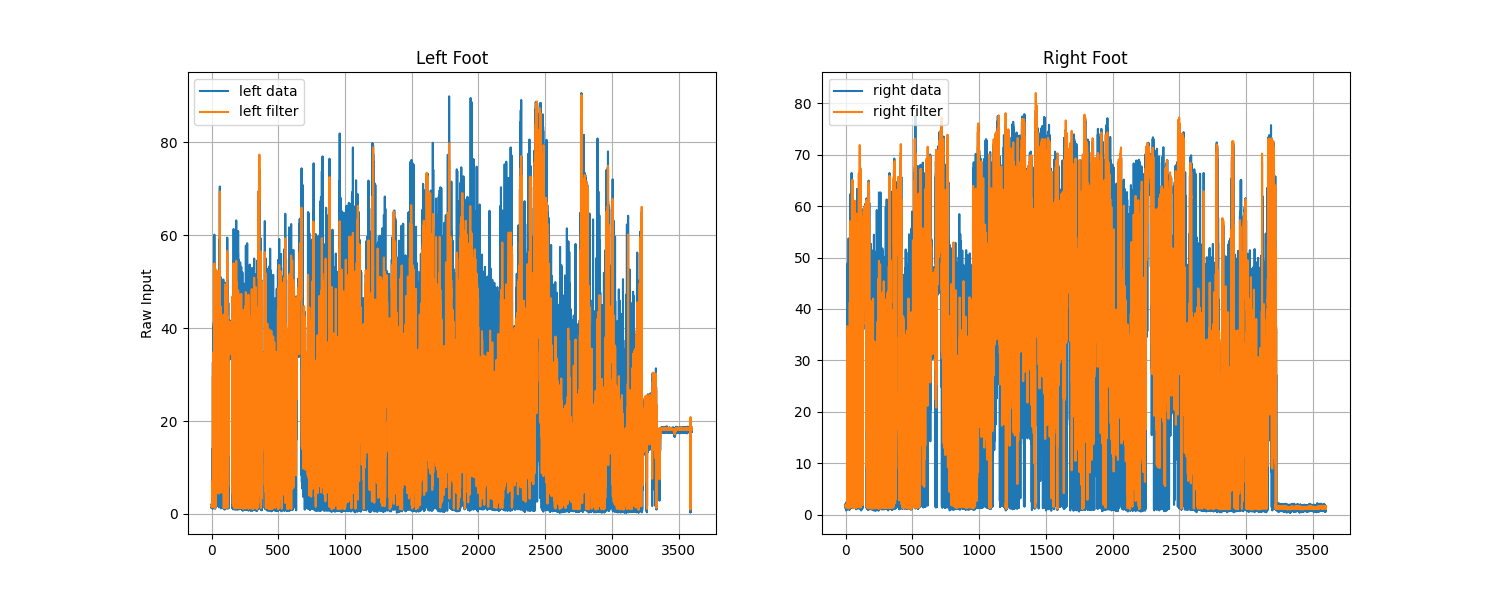

In [4]:
left_line = [8 for x in time_left]
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Left Foot')
plt.plot(time_left, left_signal, label='left data')
plt.plot(time_left, left_filter_signal, label='left filter')
plt.ylabel('Raw Input')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Right Foot')
plt.plot(time_right, right_signal, label='right data')
plt.plot(time_right, right_filter_signal, label='right filter')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')


plt.show()

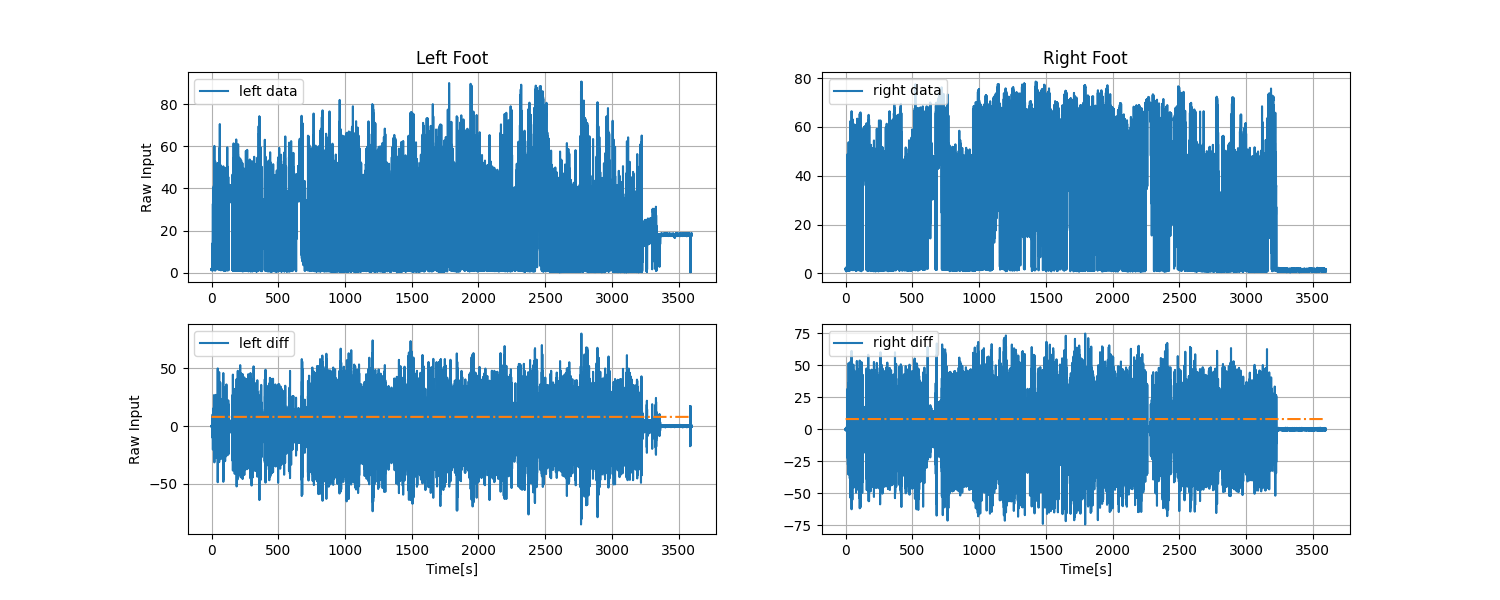

In [5]:
left_line = [8 for x in time_left]
plt.figure(figsize=(15,6))

plt.subplot(2,2,1)
plt.title('Left Foot')
plt.plot(time_left, left_signal, label='left data')
plt.ylabel('Raw Input')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.title('Right Foot')
plt.plot(time_right, right_signal, label='right data')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,3)
plt.plot(time_left, left_signal.diff(), label='left diff')
plt.plot(time_left, left_line, '-.')
plt.ylabel('Raw Input')
plt.xlabel('Time[s]')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,4)
plt.plot(time_right, right_signal.diff(), label='right diff')
plt.plot(time_left, left_line, '-.')
plt.xlabel('Time[s]')    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')


plt.show()

In [6]:
def generate_mask(signal, threshold=7):
    print('Generating Mask...')
    freq = 0.05
    seconds = 3
    window = int(seconds / freq)
    active = False
    c = 100
    count = []

    diff = signal.diff()

    for i, x in enumerate(diff):
        if i <= window:
            c += 1
            count.append(c)
            continue
        
        if x > threshold:
            active = True
            c = 0

        if active and c < window:
            c += 1
            count.append(c)
            continue 
        
        if c > window:
            active = not active

        c += 1    
        count.append(c)
        
    return np.array([True if x < window else False for x in count])


Generating Mask...
Generating Mask...


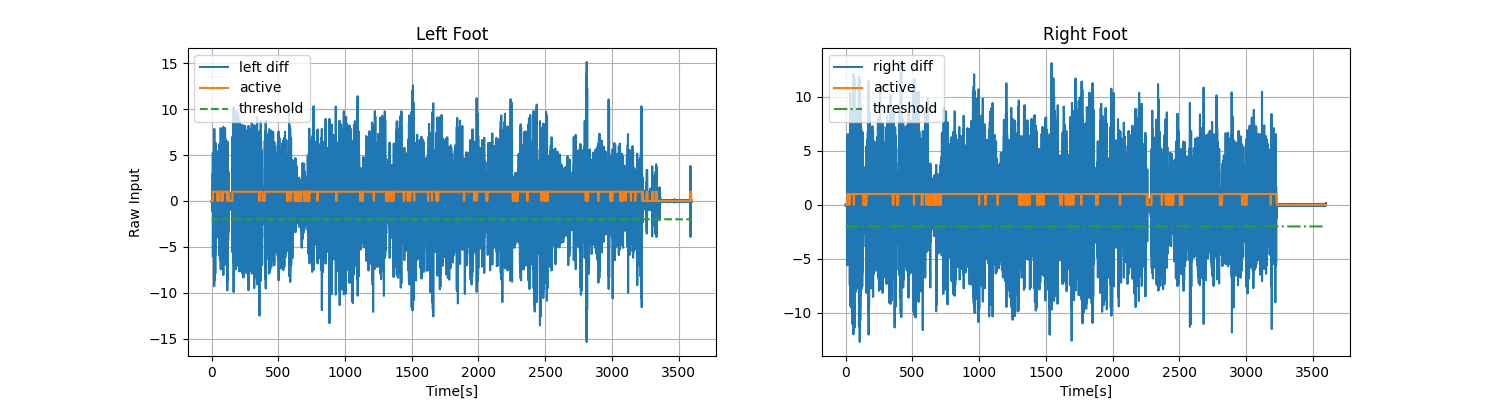

In [7]:
diff = left_filter_signal.diff()
left_mask = generate_mask(left_filter_signal, threshold=1.5)

left_line = [-2 for x in time_left]
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.title('Left Foot')
plt.plot(time_left, left_filter_signal.diff(), label='left diff')
plt.plot(time_left, left_mask, label='active')
plt.plot(time_left, left_line, '--', label='threshold')
plt.ylabel('Raw Input')
plt.xlabel('Time[s]')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

right_mask = generate_mask(right_filter_signal, threshold=1.5)
right_line = [-2 for x in time_right]

plt.subplot(1,2,2)
plt.title('Right Foot')
plt.plot(time_right, right_filter_signal.diff(), label='right diff')
plt.plot(time_right, right_mask, label='active')
plt.plot(time_right, right_line, '-.', label='threshold')
plt.xlabel('Time[s]')    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

# COP Y


Text(0.5, 0, 'Time[s]')

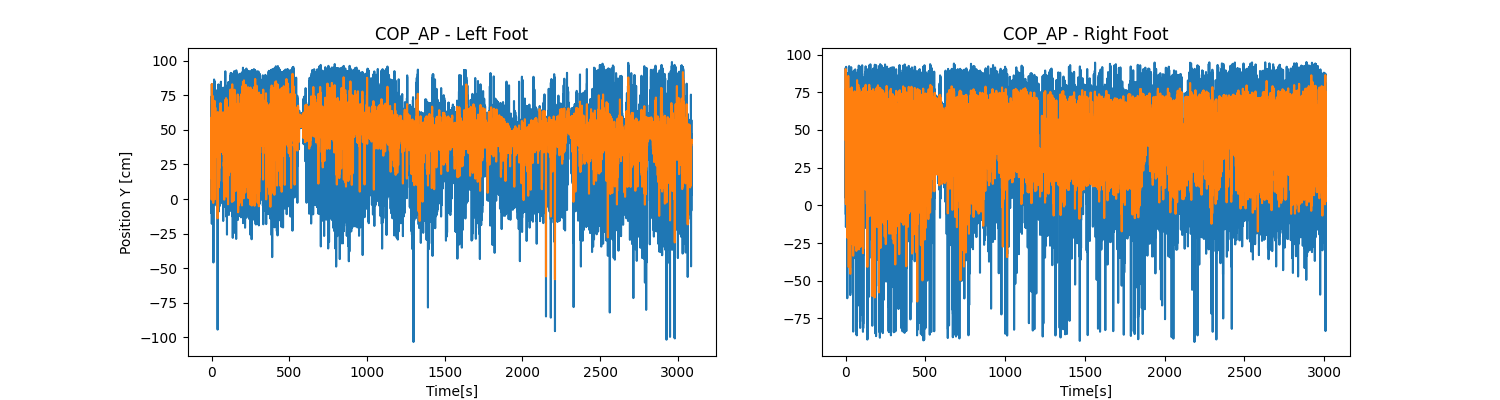

In [8]:
c = cop.CenterOfPressure([raw_left[left_mask].reset_index(), raw_right[right_mask].reset_index()])
filt_c = cop.CenterOfPressure([filter_left[left_mask].reset_index(), filter_right[right_mask].reset_index()])

left_cop = c.get_cop_foot('left')
right_cop = c.get_cop_foot('right')

filt_l_cop = filt_c.get_cop_foot('left')
filt_r_cop = filt_c.get_cop_foot('right')

left_time = [x * 0.05 for x in range(len(left_cop[0]))]
right_time = [x * 0.05 for x in range(len(right_cop[0]))]
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('COP_AP - Left Foot')
plt.plot(left_time, left_cop[1])
plt.plot(left_time, filt_l_cop[1])
plt.ylabel('Position Y [cm]')
plt.xlabel('Time[s]')
plt.subplot(1,2,2)
plt.title('COP_AP - Right Foot')
plt.plot(right_time, right_cop[1])
plt.plot(right_time, filt_r_cop[1])
plt.xlabel('Time[s]')

# COP Mask

Peak Detection


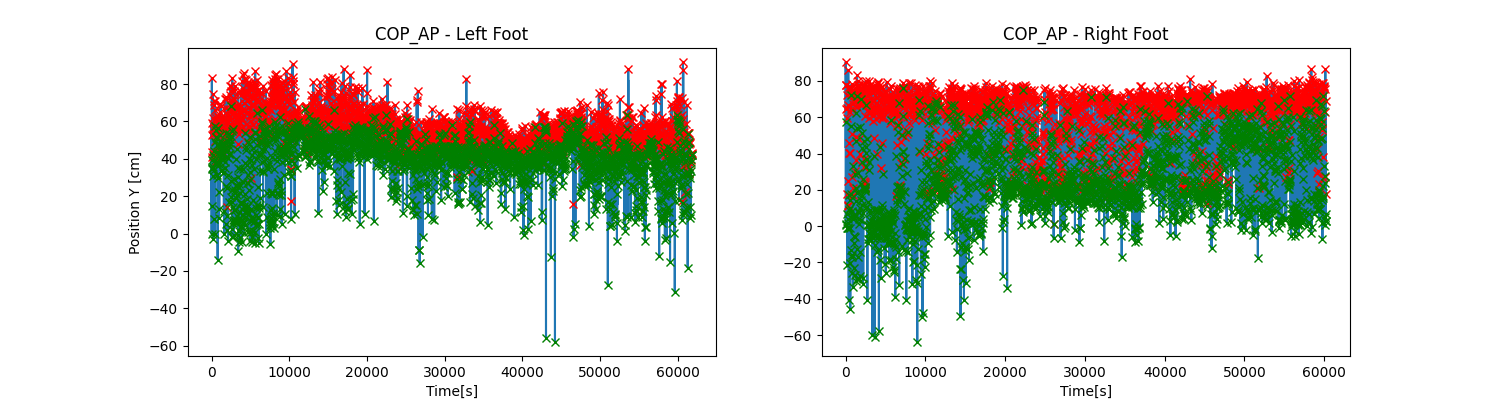

In [9]:
from scipy.signal import find_peaks

xl = filt_l_cop[1]
l_peaks_positive, _ = find_peaks(xl, distance=20)
l_peaks_negative, _ = find_peaks(-xl, distance=20)

xr = filt_r_cop[1]
r_peaks_positive, _ = find_peaks(xr,  distance=20)
r_peaks_negative, _ = find_peaks(-xr,  distance=20)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('COP_AP - Left Foot')
plt.plot(xl)
plt.plot(l_peaks_positive, xl[l_peaks_positive], "x", color='red')
plt.plot(l_peaks_negative, xl[l_peaks_negative], "x", color='green')
plt.ylabel('Position Y [cm]')
plt.xlabel('Time[s]')
plt.subplot(1,2,2)
plt.title('COP_AP - Right Foot')
plt.plot(xr)
plt.plot(r_peaks_positive, xr[r_peaks_positive], "x", color='red')
plt.plot(r_peaks_negative, xr[r_peaks_negative], "x", color='green')
plt.xlabel('Time[s]')

plt.show()


In [10]:
def closest_peaks(positive, negative): 
    distances = []
    pairs = []
    for n in negative:
        for p in positive:
            if n < p:
                distance = p - n
                pairs.append((p, n))
                distances.append(distance*0.05)
                break
            
    return distances, pairs
            

def find_cycle_time(peaks):
    # Calculate distances between pairs of peaks
    distances = []
    for i in range(len(peaks) - 1):
        distance = np.abs(peaks[i] - peaks[i + 1])
        distances.append(distance*0.05)

    return distances

def find_cop_velocity(data, time, peaks):
    velocity_array = []
    
    for i in range(len(time)):
        p, n = peaks[i]
        velocity_array.append((data[p] - data[n]) / time[i])
        
    return velocity_array
        

In [11]:
l_closest, l_pairs = closest_peaks(l_peaks_positive, l_peaks_negative)
r_closest, r_pairs = closest_peaks(r_peaks_positive, r_peaks_negative)
l_velocity = find_cop_velocity(xl, l_closest, l_pairs)
r_velocity = find_cop_velocity(xr, r_closest, r_pairs)

print('Calculations: ')
print()
print('-----------------------------------')
print('LEFT')
print('Average Step Time:', np.mean(l_closest), '[sec]')
print('Average Cycle Time ', np.mean(find_cycle_time(l_peaks_positive)),'[sec]')
print('Average COP Velocity: ', np.mean(l_velocity), '[mm/s]')
print('ML Standard Deviation:', np.std(filt_l_cop))
print()
print('-----------------------------------')
print('RIGHT')
print('Average Step Time:', np.mean(r_closest), '[sec]')
print('Average Cycle Time', np.mean(find_cycle_time(r_peaks_positive)), '[sec]')
print('Average COP Velocity: ', np.mean(r_velocity), '[mm/s]')
print('ML Standard Deviation:', np.std(filt_r_cop))


Calculations: 

-----------------------------------
LEFT
Average Step Time: 0.827788554801164 [sec]
Average Cycle Time  1.4860028860028862 [sec]
Average COP Velocity:  30.25340567632107 [mm/s]
ML Standard Deviation: 86.92757140330046

-----------------------------------
RIGHT
Average Step Time: 0.8033956692913385 [sec]
Average Cycle Time 1.4928075396825398 [sec]
Average COP Velocity:  64.33284514927139 [mm/s]
ML Standard Deviation: 37.29360172926838


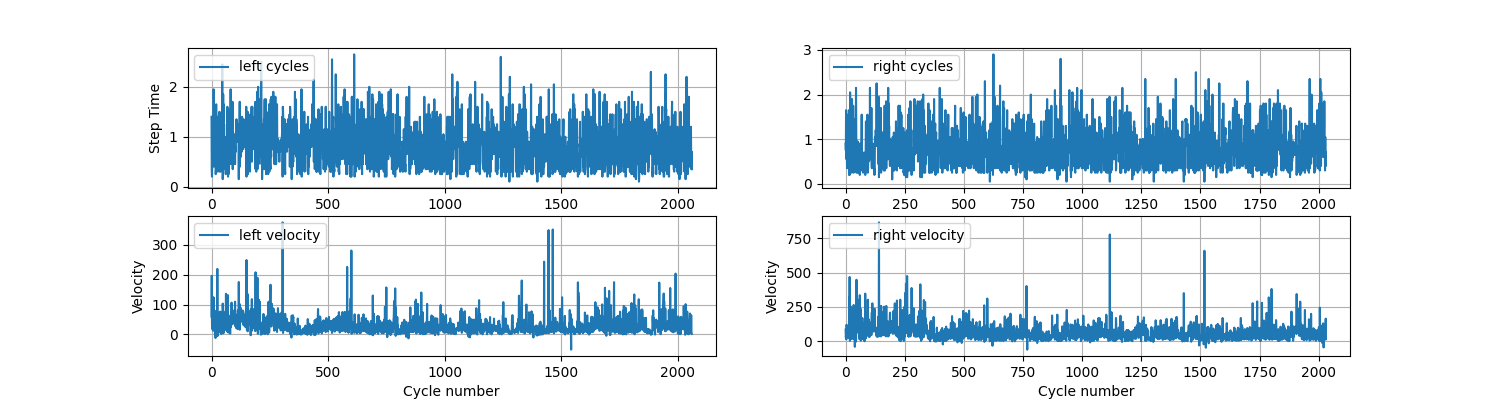

In [12]:
plt.figure(figsize=(15,4))

plt.subplot(2,2,1)
plt.plot(l_closest, label='left cycles')
plt.ylabel('Step Time')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.plot(r_closest, label='right cycles')
plt.xlabel('Step number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,3)
plt.plot(l_velocity, label='left velocity')
plt.ylabel('Velocity')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,4)
plt.plot(r_velocity, label='right velocity')
plt.ylabel('Velocity')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

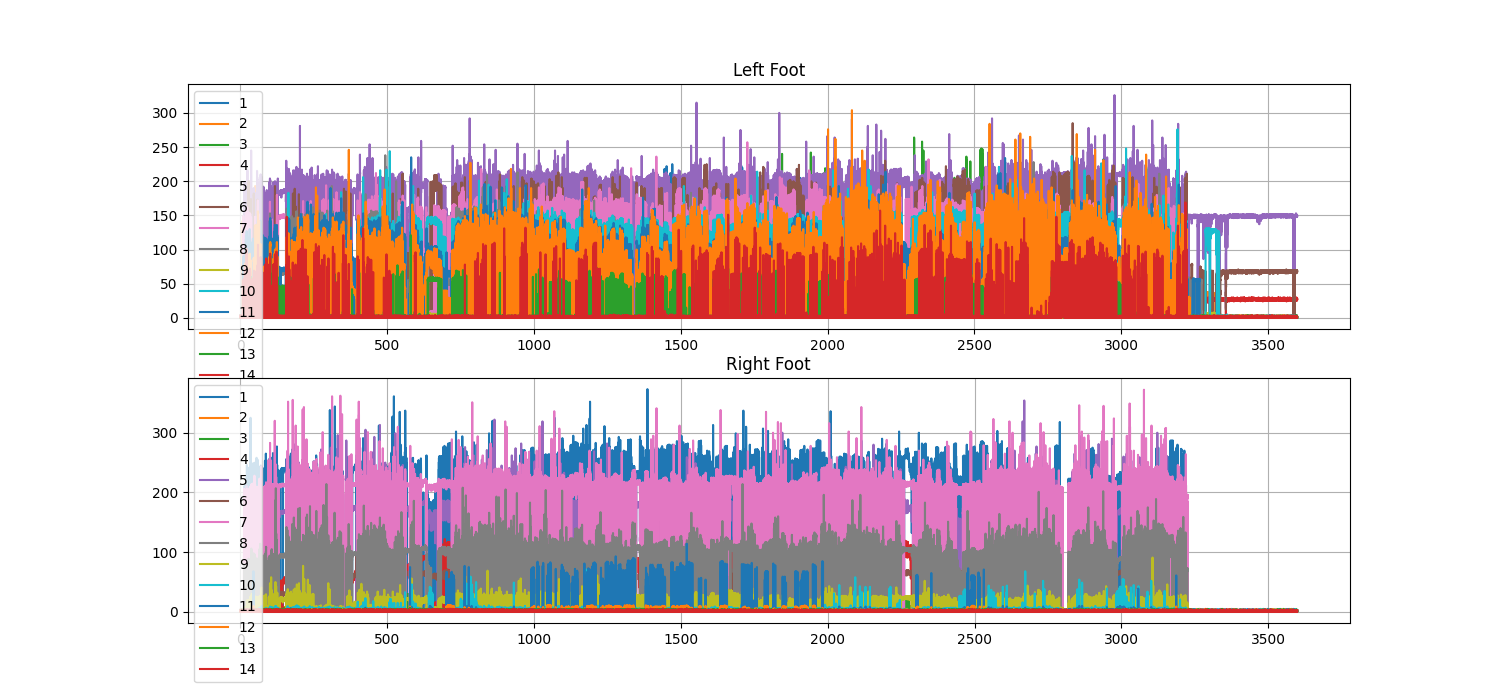

In [13]:
d = raw_left[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
for col in d.columns:
    plt.plot(time_left, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Left Foot')

d = raw_right[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.subplot(2,1,2)
for col in d.columns:
    plt.plot(time_right, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Right Foot')

plt.show()
